In [14]:
x = open("/home/julian/Downloads/raw_201901282127.UBX", "rb").read(1000)
fname = "/home/julian/data/ublox/billmotorway/rover_raw_201902041507.pos"
import pandas
f = pandas.read_csv(fname, skiprows=9, sep="\s+")
f["time"] = pandas.to_datetime(f["GPST"])
t0, t1 = f.time.iloc[0], f.time.iloc[-1]

f = f.set_index("time")

from matplotlib import pyplot as plt
%matplotlib inline

f.columns

Index(['%', 'GPST', 'latitude(deg)', 'longitude(deg)', 'height(m)', 'Q', 'ns',
       'sdn(m)', 'sde(m)', 'sdu(m)', 'sdne(m)', 'sdeu(m)', 'sdun(m)', 'age(s)',
       'ratio'],
      dtype='object')

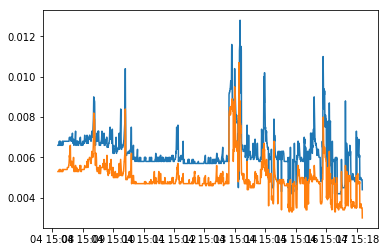

In [2]:
plt.plot(f[["sdn(m)", "sde(m)"]])

In [22]:
import math
earthrad = 6378137
nyfac = 2*math.pi*earthrad/360
lng0, lat0 = f[["longitude(deg)", "latitude(deg)"]].iloc[0]
exfac = nyfac*math.cos(math.radians(lat0))
f["x"] = (f["longitude(deg)"] - lng0)*exfac  
f["y"] = (f["latitude(deg)"] - lat0)*nyfac
f["z"] = f["height(m)"]

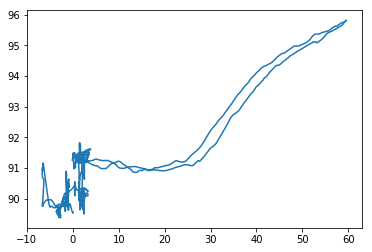

In [23]:
plt.plot(f.x, f.z)

In [64]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
r = (t1-t0)/pandas.to_timedelta("1s")
@interact(d0=r, d1=r)
def k(d0, d1):
    print(d0, d1)


10


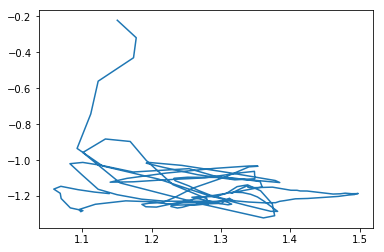

In [55]:
d0, d1 = pandas.to_timedelta("490s"), pandas.to_timedelta("523s")
g = f[t0+d0:t0+d1]
plt.plot(g.x, g.y)

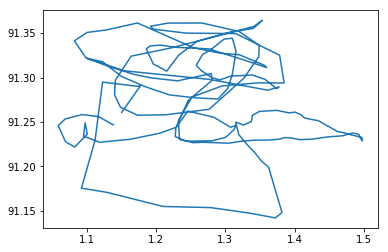

In [56]:
plt.plot(g.x, g.z)

In [3]:
x

b'\xb5b\x02\x15\xd0\x02\xa4p=\n8\xfa\x03A\xf6\x07\x12\x16\x01\x01.\xcdRy\x91\xa1\x0f\xe5tA\xf2\xc5Aw`s\x9bA\x00\xec\xf1B\x00\x1a\x00\x00\xf4\xfb4\x05\x01\x08\x0f\x003\xc5*\x19\xdf\xc6uAK\xd2qp\t\x9c\x9cA\x80&\x81\xc1\x00\x15\x00\x00\xf4\xfb-\x05\x01\x08\x0f\x00\x16;\xf1\xe0\xca\xdeuA\x15\xa9\xc8`v\xbb\x9cA\x87\x03\xddD\x00\x10\x00\x00\xf4\xfb1\x05\x01\x08\x07\x00\x85\xb4\x8a\x1d\x047wAg\x96"\xce\xb0\x7f\x9eA99i\xc5\x00\x1f\x00\x00\xf4\xfb1\x05\x01\x08\x07\x00&\x1a\x190\x82\x04wA\xa1\xe2\'eU=\x9eAS%_\xc5\x00\x1d\x00\x00\xf4\xfb!\x07\x02\x08\x0f\x00\xce\xd4\x80<\xb2\x05zA\xda\xeb\x00g\xee\x17\xa1AT\\\xffD\x02\x19\x00\x00\xf4\xfb)\x05\x01\x08\x07\x00\x8a\xe1\x1c\xe1v9xA\x1f\x90\xa7\x0e:\xd3\x9fA\xec\x071E\x00\x1b\x00\x00\xf4\xfb$\x06\x01\x08\x07\x00|p\xeb\xc7\xdb6\x83A[z\xd9\xb31>\xa9AX\xce\r\xc4\x01\x88\x00\x00\xf4\xfb*\x05\x01\x08\x07\x00\x7f\xa5\xf7Z\x01\x16vA\xd2),\xe5\xff\x03\x9dA\x08\xf2\x85\xc3\x02\x18\x00\x00\xf4\xfb/\x05\x01\x08\x07\x00Q]\x96\xd5\x02svAx?F\xbe/~\x9dA$\xce\\D\x02\

In [17]:
print(repr(b"\n"))


b'\n'


In [ ]:
b"".decode

In [ ]:
b"".decode

In [ ]:
# Direct running of serial to the ESP for harder debugging cases
# sometimes we really do hang (and the occasionally restart) as 
# can be confirmed even when using 
# picocom -b115200 /dev/ttyUSB0


In [1]:
import serial, serial.tools.list_ports

lp = list(serial.tools.list_ports.grep(""))
lp.sort(key=lambda X: (X.hwid == "n/a", X.device))
[x.device  for x in lp]

['/dev/ttyUSB0']

In [9]:
possibleports = list(serial.tools.list_ports.grep(""))

In [10]:
s = None
#help(k[1])
for kk in possibleports:
    print(kk.device, kk.hwid)
kk

/dev/ttyUSB0 USB VID:PID=10C4:EA60 SER=0001 LOCATION=1-7


In [14]:
possibleports[0].device

'/dev/ttyUSB0'

In [15]:
if s:  s.close()
portname = possibleports[0].device
baudrate = 115200
baudrate = 9600

s = serial.Serial(portname, baudrate, timeout=0.5)



In [26]:
k = s.read_all()
print(len(k))
print(k)

0
b''


In [21]:
s.write(b"\x03")
#s.write(b'\r\x03\x03')



1

In [96]:
print(s.read_all())


b''


In [23]:
s.write(b"111\x03")

4

In [25]:
import websocket
ws = websocket.create_connection("ws://192.168.4.1:8266", 5)


In [30]:
def ra():
    res = [ ]
    while True:
        r,w,e = select.select([ws],[],[],0.2)  # add a timeout to the webrepl, which can be slow
        if not r:
            break
        res.append(ws.recv())
    return res


In [48]:
ra()

['OK',
 'object ',
 "<module '",
 'umachine',
 "'>",
 ' is of type ',
 'module',
 '\r\n',
 '  ',
 '__name__',
 ' -- ',
 'umachine',
 '\r\n',
 '  ',
 'mem8',
 ' -- ',
 '<',
 '8',
 '-bit memory>',
 '\r\n',
 '  ',
 'mem16',
 ' -- ',
 '<',
 '16',
 '-bit memory>',
 '\r\n',
 '  ',
 'mem32',
 ' -- ',
 '<',
 '32',
 '-bit memory>',
 '\r\n',
 '  ',
 'freq',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'reset',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'reset_cause',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'unique_id',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'idle',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'sleep',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'deepsleep',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'disable_irq',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'enable_irq',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'time_pulse_us',
 ' -- ',
 '<',
 'function',
 '>',
 '\r\n',
 '  ',
 'RTC',
 ' -- ',
 "<class '"

In [47]:
ws.send(b"\x04")


7

In [45]:
ws.send("import machine; help(machine)")

35

In [50]:
ws.send(b"\x02")
ra()

['\r\n',
 'MicroPython v1.9.3-8-g63826ac5c on 2017-11-01; ESP module with ESP8266\r\n',
 'Type "help()" for more information.\r\n',
 '>>> ']

In [51]:
ws.close()

close status: 34816


In [49]:
"OK".encode()

b'OK'

In [37]:
s.in_waiting, s.out_waiting, s.ri, s.cd, s.cts, s.dsr

(0, 0, False, False, False, False)

In [52]:
x = b"sdfsdf"


AttributeError: 'bytes' object has no attribute 'pop'